In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns



In [2]:
df=pd.read_csv("data_proyecto.csv")
df

,property_type,bathroom,num_room,floor_num,years_old,built_area,ground_area,parking,bool_parking,elevator,...,gray_work,balcony_area,bool_balcony,bool_deposit,bool_gym,bool_laundry_area,bool_obra_gris,bool_last_floor,bool_pool,floors_number
0,departamento_en_condominio_o_unidad_habitacional,2.0,3.0,2,24.0,70,70,1,1,0.0,...,0,0,0,0,0,0,0,0,0,0
1,departamento_en_condominio_o_unidad_habitacional,1.0,3.0,5,19.0,66,66,1,1,0.0,...,0,0,0,0,0,0,0,0,0,0
2,departamento_en_condominio_o_unidad_habitacional,2.0,3.0,3,14.0,300,300,2,1,0.0,...,0,0,0,0,0,0,0,0,0,0
3,departamento_en_condominio_o_unidad_habitacional,2.0,2.0,1,1.0,70,70,2,1,0.0,...,0,0,0,0,0,0,0,0,0,0
4,departamento_en_condominio_o_unidad_habitacional,2.0,3.0,3,20.0,106,106,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,casa_sola,4.0,6.0,1,39.0,300,324,2,1,0.0,...,0,0,0,0,0,0,0,0,0,0
149996,departamento_en_condominio_o_unidad_habitacional,1.0,2.0,2,30.0,60,60,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
149997,casa_sola,1.0,4.0,1,70.0,200,170,0,0,0.0,...,1,0,0,0,0,0,1,0,0,0
149998,casa_en_condominio,1.0,1.0,1,12.0,32,32,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df = df[(df['years_old'] >= 0) & (df['years_old'] <= 150) & (df['precio'] <=5.5e+6) & ((df['bathroom'] <= 15))
    & (df['num_room'] <= 50) & (df['floor_num'] <= 50) & (df['built_area'] <= 900) & (df['parking'] <= 15)
    & (df['ground_area'] <= 900) & ((df['ground_area'] > 0)) ]

In [4]:
df.isnull().sum()

property_type           0
bathroom                0
num_room                0
floor_num               0
years_old               0
built_area              0
ground_area             0
parking                 0
bool_parking            0
elevator             4496
precio                  0
latitude                0
longitude               0
localidad               0
ciudad                  0
gray_work               0
balcony_area            0
bool_balcony            0
bool_deposit            0
bool_gym                0
bool_laundry_area       0
bool_obra_gris          0
bool_last_floor         0
bool_pool               0
floors_number           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127287 entries, 0 to 149998
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   property_type      127287 non-null  object 
 1   bathroom           127287 non-null  float64
 2   num_room           127287 non-null  float64
 3   floor_num          127287 non-null  int64  
 4   years_old          127287 non-null  float64
 5   built_area         127287 non-null  int64  
 6   ground_area        127287 non-null  int64  
 7   parking            127287 non-null  int64  
 8   bool_parking       127287 non-null  int64  
 9   elevator           122791 non-null  float64
 10  precio             127287 non-null  float64
 11  latitude           127287 non-null  float64
 12  longitude          127287 non-null  float64
 13  localidad          127287 non-null  object 
 14  ciudad             127287 non-null  object 
 15  gray_work          127287 non-null  int64  
 16  balcony

In [6]:
print(df.shape)
df.describe()


(127287, 25)


,bathroom,num_room,floor_num,years_old,built_area,ground_area,parking,bool_parking,elevator,precio,...,gray_work,balcony_area,bool_balcony,bool_deposit,bool_gym,bool_laundry_area,bool_obra_gris,bool_last_floor,bool_pool,floors_number
count,127287.000000,127287.000000,127287.000000,127287.000000,127287.000000,127287.000000,127287.000000,127287.000000,122791.000000,1.272870e+05,...,127287.000000,127287.000000,127287.000000,127287.000000,127287.000000,127287.000000,127287.000000,127287.000000,127287.000000,127287.000000
mean,1.688311,2.694698,1.750069,18.069237,114.560120,111.646335,1.275087,0.866114,0.124732,2.159700e+06,...,0.044875,0.156662,0.014346,0.027552,0.003119,0.013513,0.044875,0.033790,0.001414,0.001359
std,0.855894,1.142140,1.785207,14.531745,79.208593,77.774735,0.824356,0.340532,0.330416,1.293251e+06,...,0.207030,3.921640,0.118911,0.163686,0.055760,0.115457,0.207030,0.180688,0.037578,0.045951
min,0.000000,0.000000,1.000000,0.000000,20.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,7.000000,62.000000,64.000000,1.000000,1.000000,0.000000,1.000000e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,3.000000,1.000000,15.000000,90.000000,90.000000,1.000000,1.000000,0.000000,2.000000e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,3.000000,2.000000,26.000000,142.000000,129.000000,2.000000,1.000000,0.000000,3.100000e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,15.000000,34.000000,50.000000,133.000000,900.000000,900.000000,12.000000,1.000000,1.000000,5.500000e+06,...,1.000000,729.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


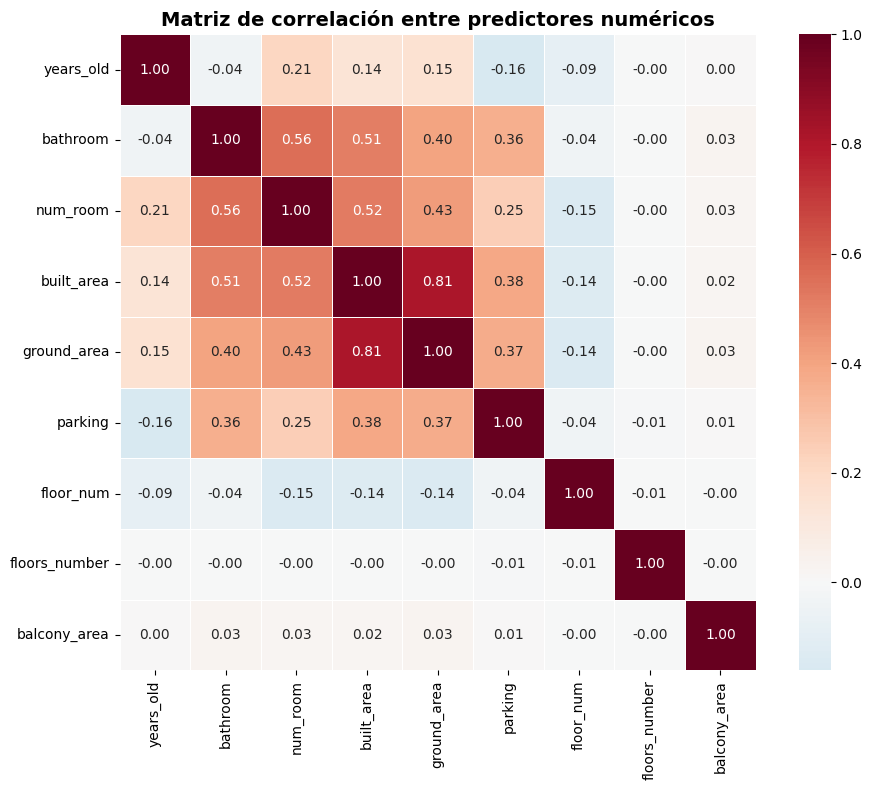

In [7]:
# Selección de variables numéricas relevantes
cols_num = [
    'years_old',
    'bathroom',
    'num_room',
    'built_area',
    'ground_area',
    'parking',
    'floor_num',
    'floors_number',
    'balcony_area'
]

# Matriz de correlación
corr_mat = df[cols_num].corr()

# Correlograma
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(
    corr_mat,
    annot=True,
    fmt='.2f',
    cmap='RdBu_r',
    center=0,
    square=True,
    linewidths=0.5,
    ax=ax
)

ax.set_title('Matriz de correlación entre predictores numéricos',
             fontsize=14,
             fontweight='bold')

plt.tight_layout()
plt.show()

/var/folders/8t/d100yqrn4xn1qyg525nsgxs00000gp/T/ipykernel_37009/2411895306.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()  # quitamos leyenda redundante


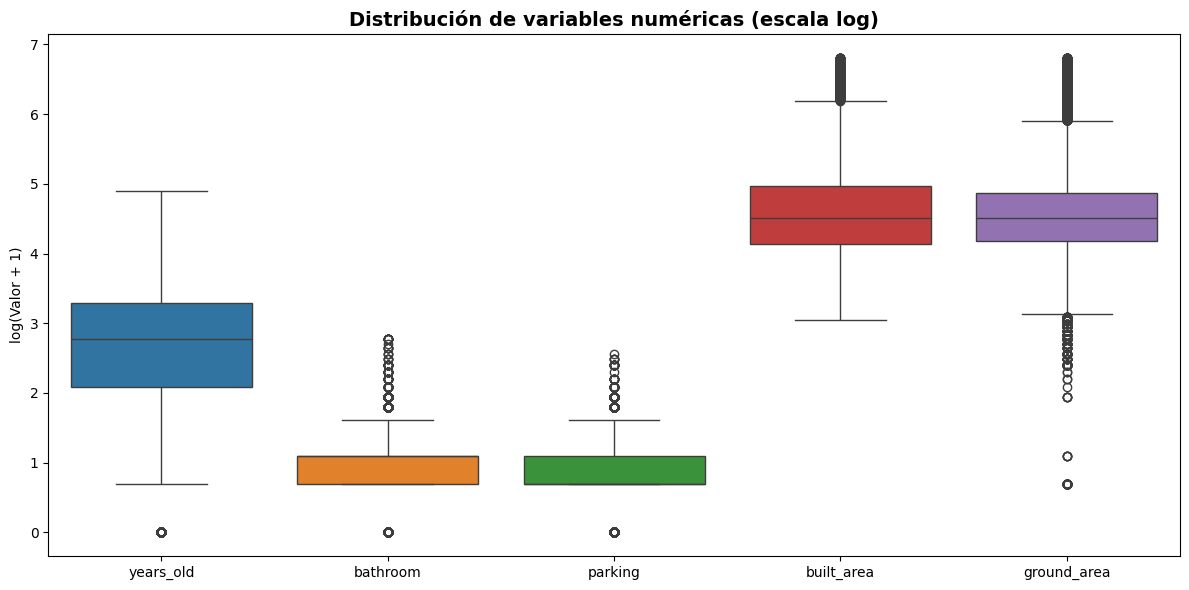

In [8]:
cols_num = [
    'years_old',
    'bathroom',
    'parking',
    'built_area',
    'ground_area'
]

# Convertimos a formato largo
eda_lags = df[cols_num].melt(var_name='Variable', value_name='Valor')

# Aplicamos log1p antes de graficar (más limpio)
eda_lags['Valor_log'] = np.log1p(eda_lags['Valor'])

fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(
    data=eda_lags,
    x='Variable',
    y='Valor_log',
    hue='Variable',
    dodge=False,
    ax=ax
)

ax.set_title('Distribución de variables numéricas (escala log)', 
             fontsize=14, 
             fontweight='bold')

ax.set_ylabel('log(Valor + 1)')
ax.set_xlabel('')

ax.legend().remove()  # quitamos leyenda redundante

plt.tight_layout()
plt.show()

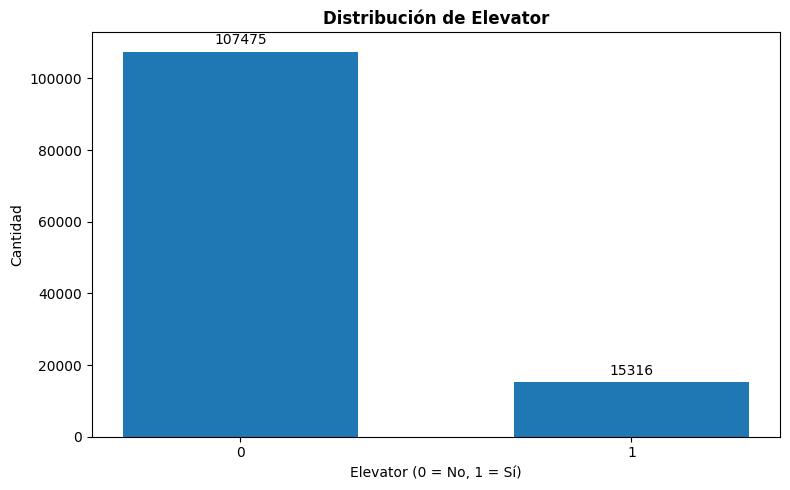

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))

# Eliminamos nulos
elevator_counts = df['elevator'].dropna().value_counts().sort_index()

ax.bar(
    elevator_counts.index.astype(int), 
    elevator_counts.values,
    width=0.6
)

ax.set_title('Distribución de Elevator', fontsize=12, fontweight='bold')
ax.set_xlabel('Elevator (0 = No, 1 = Sí)')
ax.set_ylabel('Cantidad')

ax.set_xticks([0, 1])

# Etiquetas encima de las barras
for i, v in enumerate(elevator_counts.values):
    ax.text(elevator_counts.index[i], v + 2000, str(v), ha='center')

plt.tight_layout()
plt.show()

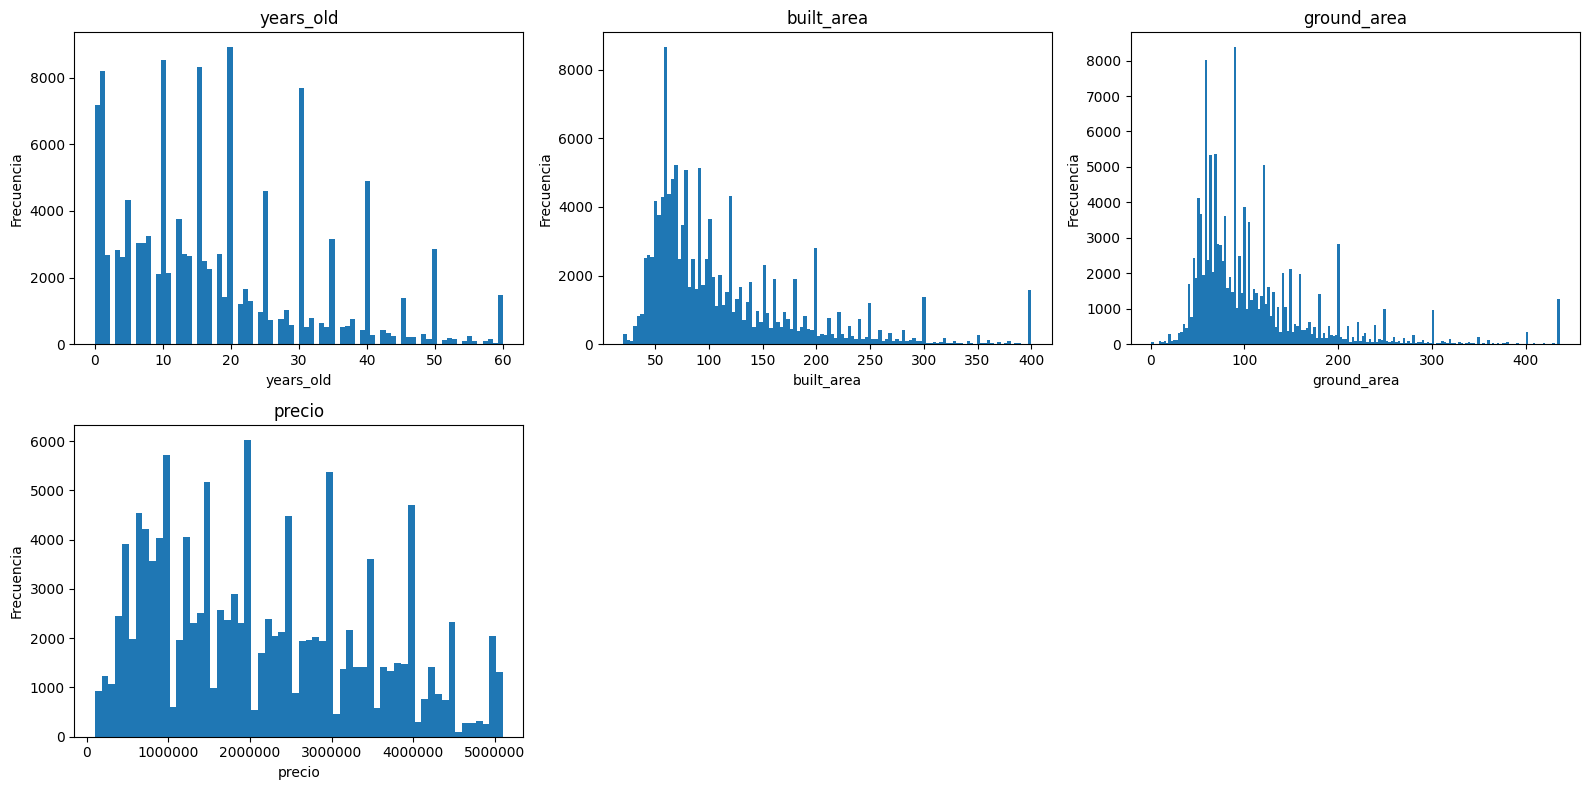

In [12]:
# Variables a graficar (ajustadas al df real)
cols = [
    'years_old',
    'built_area',
    'ground_area',
    'precio'
]

# Recorte superior para que se vea la distribución
p = 0.99  

# Layout: 2 filas x 3 columnas
ncols = 3
nrows = int(np.ceil(len(cols) / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(cols):
    x = df[col].dropna()

    # Recorte (solo cola superior)
    upper = x.quantile(p)
    x_clip = x.clip(upper=upper)

    axes[i].hist(x_clip, bins="fd")
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")
    axes[i].ticklabel_format(style="plain", axis="x")

# Apaga ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

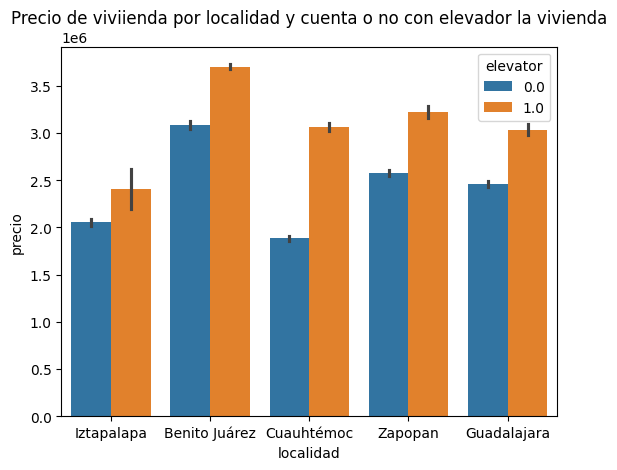

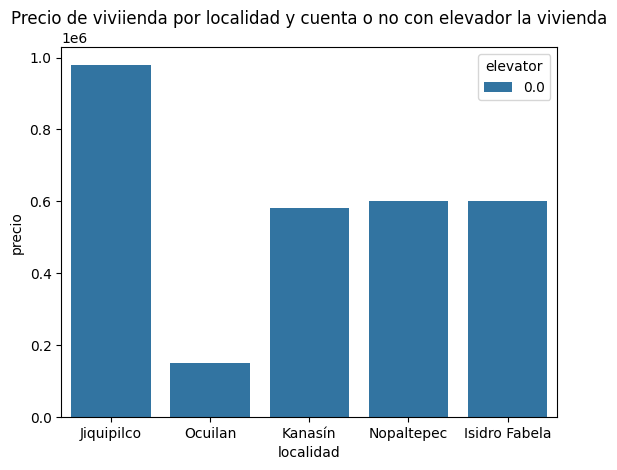

In [11]:
# Creating a grouped bar chart
suma_por_localidad = df.groupby("localidad")["precio"].sum()
top10_localidadesMAX = suma_por_localidad.nlargest(5).index
top10_localidadesMIN = suma_por_localidad.nsmallest(5).index
df_filtrado = df[df["localidad"].isin(top10_localidadesMAX)]
df_filtrado1 = df[df["localidad"].isin(top10_localidadesMIN)]

sns.barplot(data=df_filtrado, x='localidad', y='precio', hue='elevator')
plt.title('Precio de viviienda por localidad y cuenta o no con elevador la vivienda')
#plt.savefig('REV1JPVP.png')
plt.show()

sns.barplot(data=df_filtrado1, x='localidad', y='precio', hue='elevator')
plt.title('Precio de viviienda por localidad y cuenta o no con elevador la vivienda')
#plt.savefig('REV2JPVP.png')
plt.show()